In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('loan.csv')
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

# Data Cleaning

In [5]:
df.shape

(39717, 111)

In [6]:
# Find percentage of null values in each column
df.isna().mean() * 100

id                                  0.000000
member_id                           0.000000
loan_amnt                           0.000000
funded_amnt                         0.000000
funded_amnt_inv                     0.000000
term                                0.000000
int_rate                            0.000000
installment                         0.000000
grade                               0.000000
sub_grade                           0.000000
emp_title                           6.191303
emp_length                          2.706650
home_ownership                      0.000000
annual_inc                          0.000000
verification_status                 0.000000
issue_d                             0.000000
loan_status                         0.000000
pymnt_plan                          0.000000
url                                 0.000000
desc                               32.585543
purpose                             0.000000
title                               0.027696
zip_code  

In [7]:
# Dropping all columns which have more than 60% null values as these are useless for our analysis
df = df.dropna(thresh=len(df)-39717*0.6, axis=1)

In [8]:
# remove months from the term and convert to integer
df['term'] = df['term'].str[:-6].astype(int)

In [9]:
# Removed % from the end and converted to float
df['int_rate'] = df['int_rate'].str[:-1].astype(float)

In [10]:
df['revol_util'] = df['revol_util'].str[:-1].astype(float)

In [11]:
# Drop columns containing single unique value
df = df.drop(columns=['collections_12_mths_ex_med', 'application_type', 'acc_now_delinq', 
                      'chargeoff_within_12_mths','delinq_amnt', 'tax_liens',
                      'policy_code', 'pymnt_plan', 'policy_code', 'initial_list_status'])

In [12]:
df.shape

(39717, 45)

In [13]:
#Check what percentage of columns have null values
df.isna().sum()*100/len(df)

id                          0.000000
member_id                   0.000000
loan_amnt                   0.000000
funded_amnt                 0.000000
funded_amnt_inv             0.000000
term                        0.000000
int_rate                    0.000000
installment                 0.000000
grade                       0.000000
sub_grade                   0.000000
emp_title                   6.191303
emp_length                  2.706650
home_ownership              0.000000
annual_inc                  0.000000
verification_status         0.000000
issue_d                     0.000000
loan_status                 0.000000
url                         0.000000
desc                       32.585543
purpose                     0.000000
title                       0.027696
zip_code                    0.000000
addr_state                  0.000000
dti                         0.000000
delinq_2yrs                 0.000000
earliest_cr_line            0.000000
inq_last_6mths              0.000000
o

In [14]:
# Drop columns which are not useful
df = df.drop(columns=['id', 'member_id', 'emp_title', 
                      'url', 'desc', 'zip_code', 'addr_state',
                       'last_credit_pull_d',
                      'last_pymnt_amnt','last_pymnt_d', 
                      'collection_recovery_fee', 'recoveries',
                      'earliest_cr_line', 'inq_last_6mths' ])

In [15]:
# Removing following columns out_prncp, out_prncp_inv, total_rec_prncp, total_rec_int Since we already have total_pymnt, total_pymnt_inv
df = df.drop(columns=['out_prncp', 'out_prncp_inv', 'total_rec_prncp', 'total_rec_int'])

In [16]:
df = df.drop(columns=['funded_amnt_inv', 'total_pymnt_inv', 'total_rec_late_fee'])

In [17]:
df.shape

(39717, 24)

In [18]:
#Check how many values in rows are null. Since max 2 values are missing from rows we are not removing any rows
df.isna().sum(axis=1).max()

2

In [19]:
# There are just 1140 rows with current loan_status and it not be driving factor for loan default 
df_loan = df[df['loan_status'] != 'Current']

In [20]:
#Fix emp_length column
df_loan['emp_length'] = df_loan['emp_length'].apply(lambda x : "10" if x == "10+ years" else "0" if x == "< 1 year" else "1" if x == '1 year' else str(x)[0:1] if isinstance(x, str) else "-1")

In [21]:
df_loan['emp_length'] = df_loan['emp_length'].astype("int64")

In [22]:
df_loan['emp_length'].isna().sum()
#Fill the values where emp_length is nut present

0

In [23]:
# What is the frequent annual income of employees where employee length is missing
df_loan[df_loan['emp_length'].isna()]['annual_inc'].mode()

Series([], Name: annual_inc, dtype: float64)

In [24]:
df_loan[df_loan['annual_inc'] == 36000]['emp_length'].mode()

0    3
Name: emp_length, dtype: int64

In [25]:
df_loan['emp_length'] = df_loan['emp_length'].apply(lambda x : "3" if x == -1 else x)

In [26]:
df_loan['emp_length'].isna().sum()

0

In [27]:
# Unify values like Source Verified and Verified under same value
df_loan['verification_status'] = df_loan['verification_status'].apply(lambda x : "Verified" if x == 'Source Verified' else x)

### Convert numberical variables into ordered categorical

In [29]:
df_loan['annual_inc_bin'] = pd.cut(df_loan['annual_inc'], bins=[0, 35000, 60000, 80000, 130000, 300000])
df_loan['int_rate_bin'] = pd.cut(df_loan['int_rate'], bins=5)
df_loan['dti_bin'] = pd.cut(df_loan['dti'], bins=5)
df_loan['installment_bin'] = pd.cut(df_loan['installment'], bins=5)



## Categorical Variables - 
* Ordered Categorical Variables - 
        grade, sub_grade
* UnOrdered Categorical Variables - 
        verification_status, loan_status
* Quantitative Variables  
    funded_amnt, int_rate, installment, 
    annual_inc, dti, delinq_2yrs, pub_rec, revol_bal, 
    revol_util, total_acc, total_pymnt, pub_rec_bankruptcies, open_acc

dtype - 
object - categorical
reacl number - conitnuous

  TODO - remove pub_rec_bankruptcies

  continuous - scatter, hist (categorical)
  vs
  discrete variables - bar

  

In [31]:
loan_status_order_categorical_col = ['grade', 'sub_grade', 'term', 'emp_length', 'annual_inc_bin', 'int_rate_bin', 'dti_bin', 'installment_bin']
loan_status_unorder_categorical_col = ['verification_status', 'loan_status', 'home_ownership', 'purpose' ]
loan_status_continuous_col = ['int_rate', 'annual_inc', 'dti', 'installment', 'delinq_2yrs', 'pub_rec_bankruptcies']

In [32]:
df_loan.shape

(38577, 28)

In [33]:
df_loan.columns

Index(['loan_amnt', 'funded_amnt', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'delinq_2yrs', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'total_pymnt', 'pub_rec_bankruptcies', 'annual_inc_bin',
       'int_rate_bin', 'dti_bin', 'installment_bin'],
      dtype='object')

# Univariate Analysis

In [35]:
df_loan.dtypes

loan_amnt                  int64
funded_amnt                int64
term                       int32
int_rate                 float64
installment              float64
grade                     object
sub_grade                 object
emp_length                object
home_ownership            object
annual_inc               float64
verification_status       object
issue_d                   object
loan_status               object
purpose                   object
title                     object
dti                      float64
delinq_2yrs                int64
open_acc                   int64
pub_rec                    int64
revol_bal                  int64
revol_util               float64
total_acc                  int64
total_pymnt              float64
pub_rec_bankruptcies     float64
annual_inc_bin          category
int_rate_bin            category
dti_bin                 category
installment_bin         category
dtype: object

In [36]:
df_loan.dtypes

loan_amnt                  int64
funded_amnt                int64
term                       int32
int_rate                 float64
installment              float64
grade                     object
sub_grade                 object
emp_length                object
home_ownership            object
annual_inc               float64
verification_status       object
issue_d                   object
loan_status               object
purpose                   object
title                     object
dti                      float64
delinq_2yrs                int64
open_acc                   int64
pub_rec                    int64
revol_bal                  int64
revol_util               float64
total_acc                  int64
total_pymnt              float64
pub_rec_bankruptcies     float64
annual_inc_bin          category
int_rate_bin            category
dti_bin                 category
installment_bin         category
dtype: object

### dti across loan status

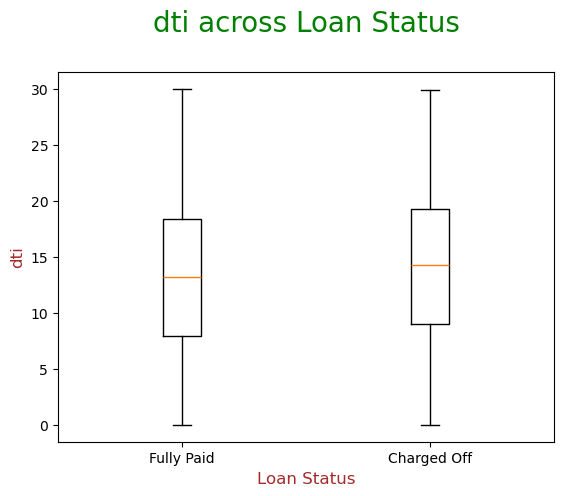

In [38]:
df_full_paid_dti = df_loan[df['loan_status'] == 'Fully Paid']['dti']
df_charged_off_dti = df_loan[df['loan_status'] =='Charged Off']['dti']
plt.boxplot([df_full_paid_dti, df_charged_off_dti])
# Adding and formatting title
plt.title("dti across Loan Status\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})

# Labeling Axes
plt.xlabel("Loan Status", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("dti", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})

plt.xticks((1,2),["Fully Paid", "Charged Off"])
plt.show()
#Conclusion there is no significat different between dti for fully paid charged off loans

### Univariate analysis - Unordered Categorical

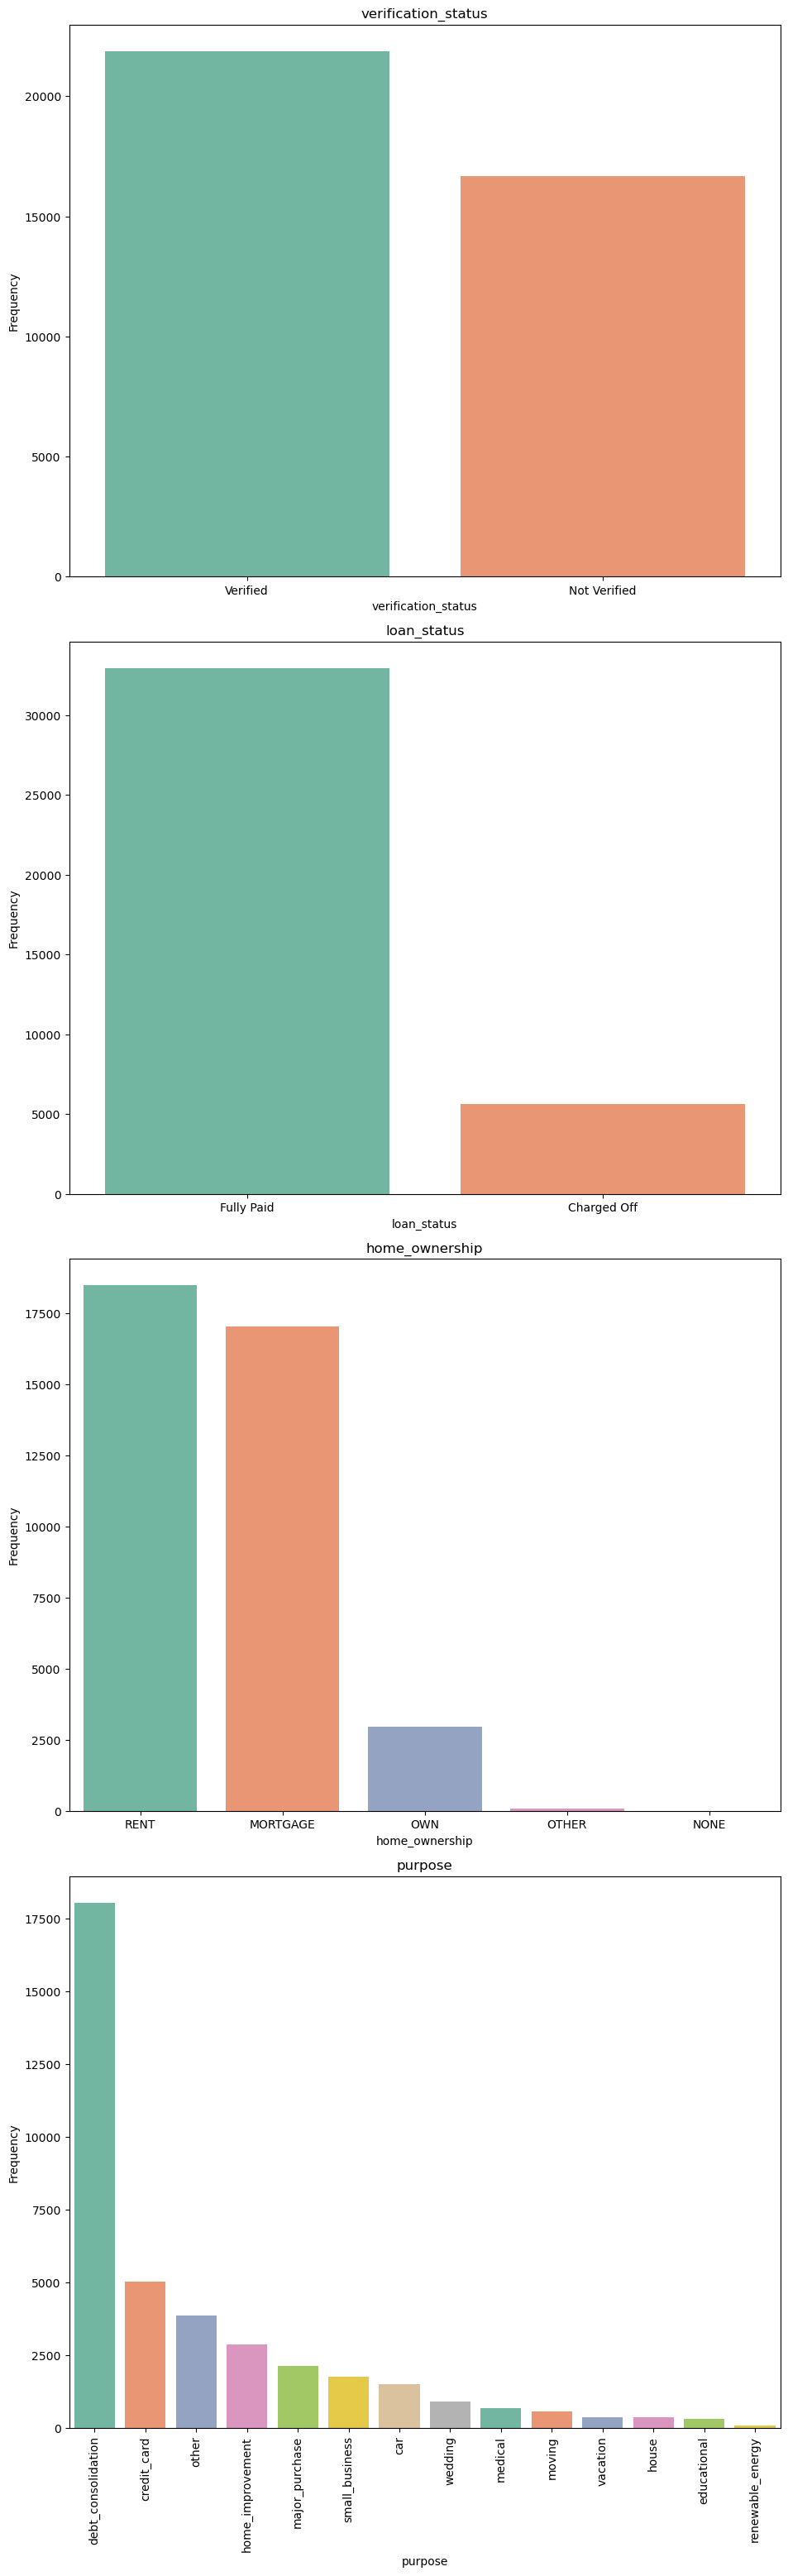

In [40]:


fig, axs = plt.subplots( len(loan_status_unorder_categorical_col), 1, figsize=(10, 30))

# Loop through the columns and plot on each subplot
for index, col in enumerate(loan_status_unorder_categorical_col):
    sns.countplot(data=df_loan, x=col,  palette="Set2", ax=axs[index], order=df_loan[col].value_counts().index)
    axs[index].set_title(col)  # Set title for each subplot
    axs[index].set_ylabel('Frequency')  # Optional: Set ylabel for clarity
    
# Adjust the layout to avoid overlap of subplots
plt.tight_layout()
plt.xticks(rotation=90)

plt.show()

### Univariate Analysis - Ordered Categorical 

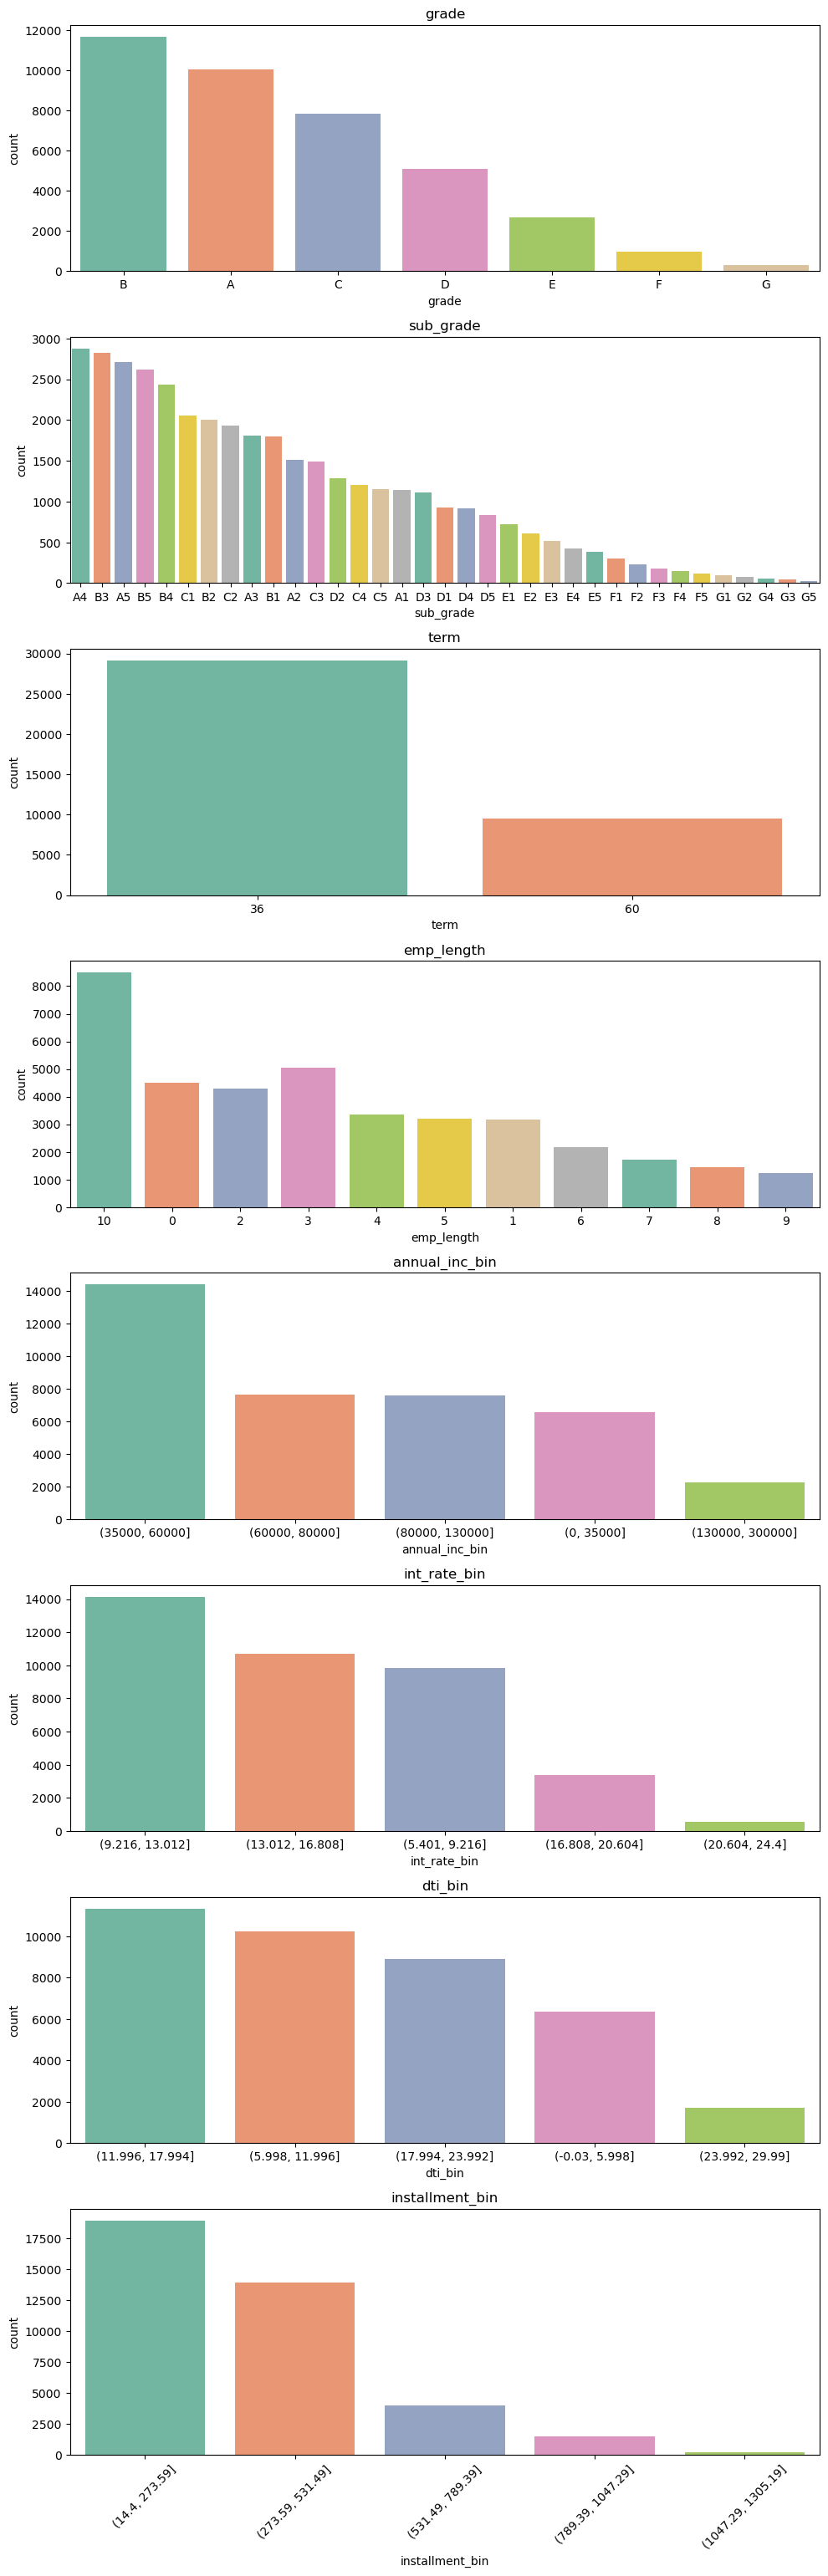

In [42]:
# Create subplots for each categorical column
fig, axs = plt.subplots( len(loan_status_order_categorical_col), 1, figsize=(10, 30))

# Loop through the columns and plot on each subplot
for index, col in enumerate(loan_status_order_categorical_col):
    sns.countplot(data=df_loan, x=col,  palette="Set2", ax=axs[index], order=df_loan[col].value_counts().index)
    axs[index].set_title(col)  # Set title for each subplot
    #axs[index].set_ylabel('Frequency')  # Optional: Set ylabel for clarity
    
# Adjust the layout to avoid overlap of subplots
plt.tight_layout()
plt.xticks(rotation=45)

plt.show()

Conclusion - Generally loans are categorised as moderate risk

### Univariate Analysis - Continuous Data

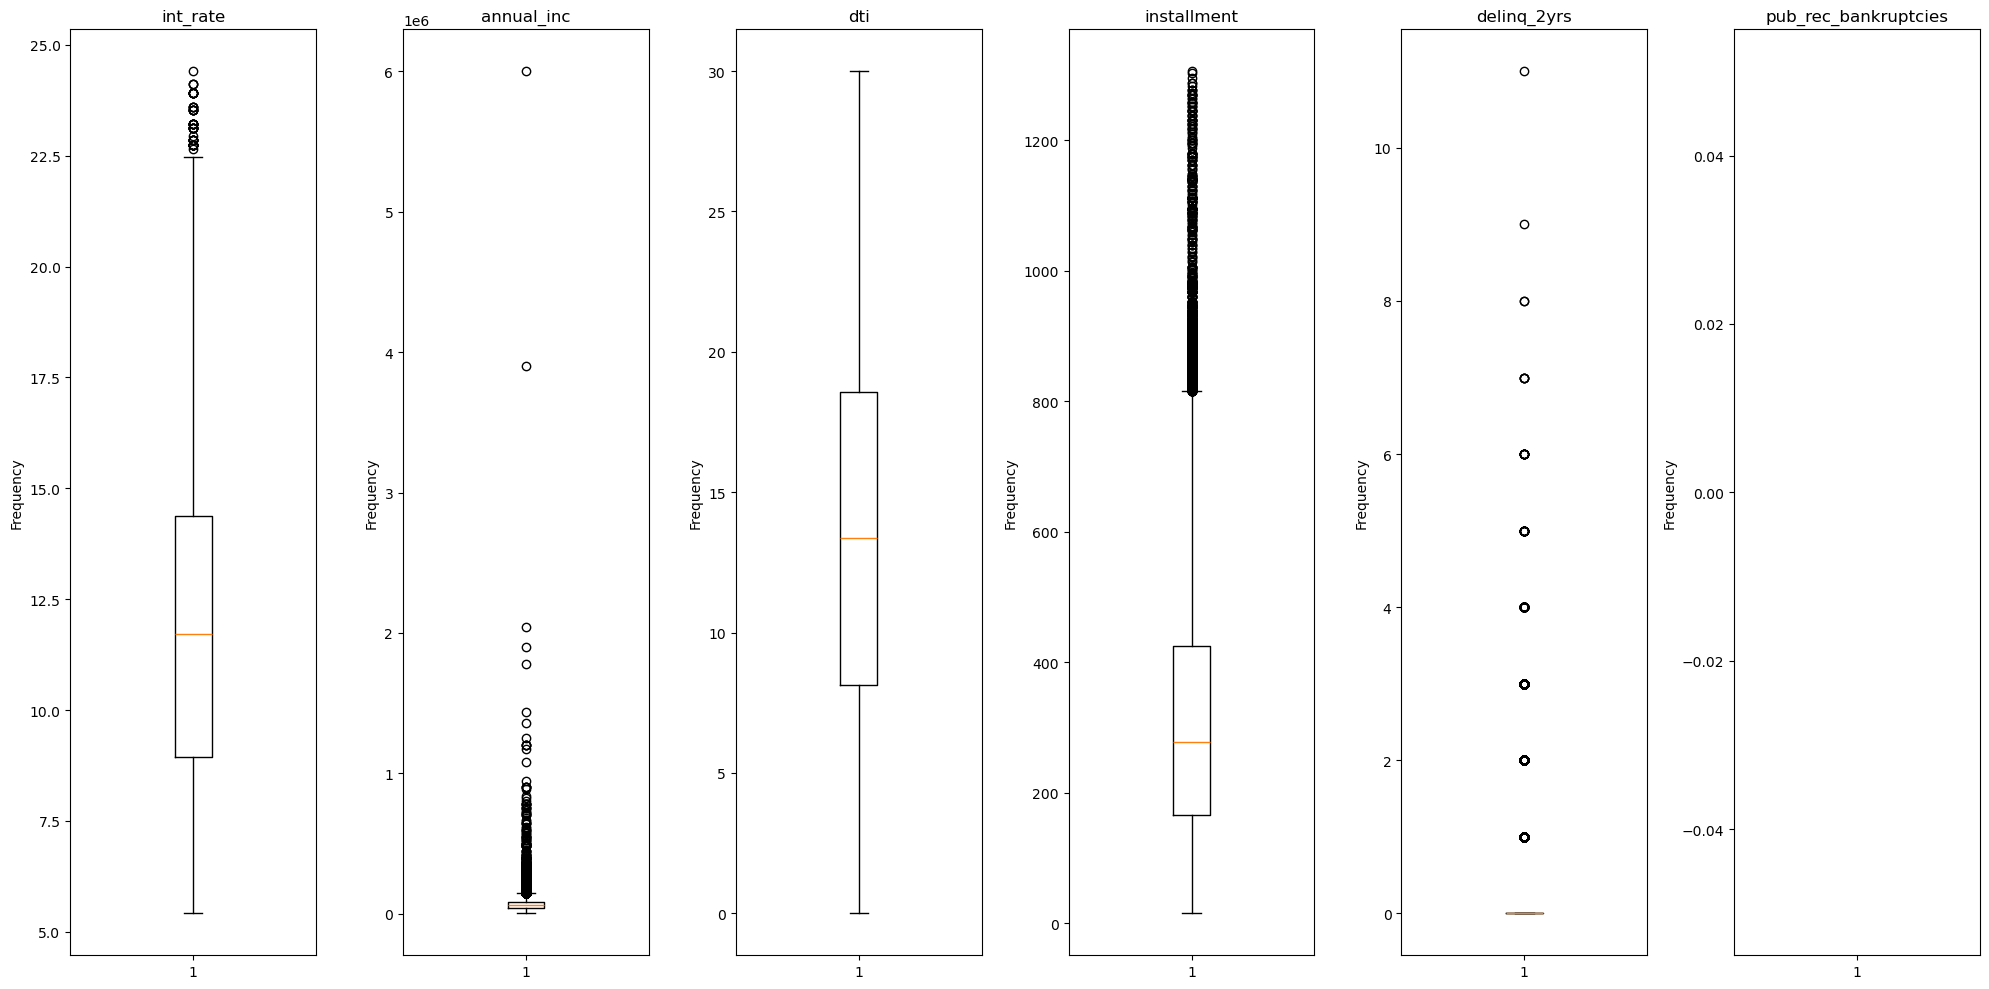

In [45]:

# Create subplots for each categorical column
fig, axs = plt.subplots(1, len(loan_status_continuous_col), figsize=(20, 10))

# Loop through the columns and plot on each subplot
for index, col in enumerate(loan_status_continuous_col):
    axs[index].boxplot(df_loan[col])
    axs[index].set_title(col)  # Set title for each subplot
    axs[index].set_ylabel('Frequency')  # Optional: Set ylabel for clarity

    
# Adjust the layout to avoid overlap of subplots
plt.tight_layout()

plt.show()

In [46]:
df_loan.dtypes

loan_amnt                  int64
funded_amnt                int64
term                       int32
int_rate                 float64
installment              float64
grade                     object
sub_grade                 object
emp_length                object
home_ownership            object
annual_inc               float64
verification_status       object
issue_d                   object
loan_status               object
purpose                   object
title                     object
dti                      float64
delinq_2yrs                int64
open_acc                   int64
pub_rec                    int64
revol_bal                  int64
revol_util               float64
total_acc                  int64
total_pymnt              float64
pub_rec_bankruptcies     float64
annual_inc_bin          category
int_rate_bin            category
dti_bin                 category
installment_bin         category
dtype: object

In [47]:
len(df_loan[df_loan['int_rate'] > 22.5])*100/len(df_loan)
# Since int_rate greater than 22.5 is 0.17% hence we can remove them
df_loan = df_loan[df_loan['int_rate'] < 22.5]

In [48]:
#Remove outliers for annual income. income >= 200000 are considered outliers
df_loan = df_loan[df_loan['annual_inc'] < 200000]

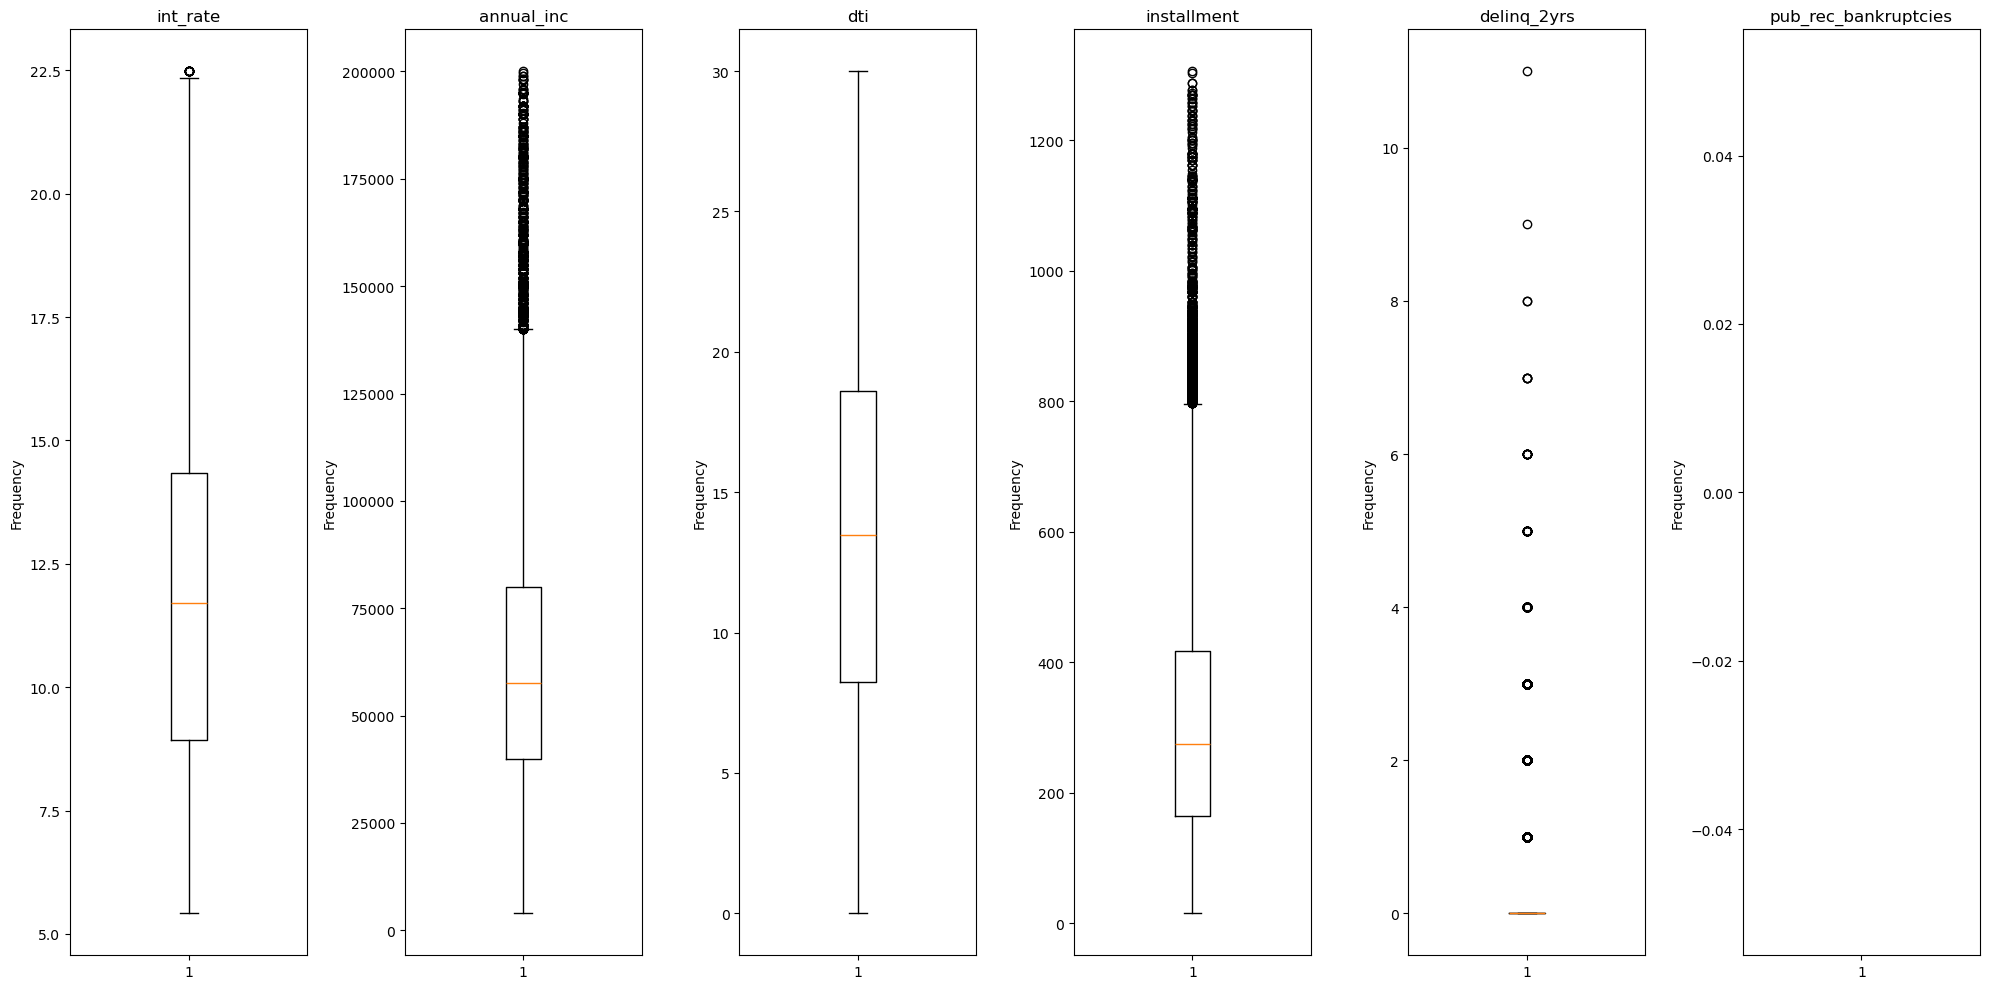

In [49]:
#Checking the data again

# Create subplots for each categorical column
fig, axs = plt.subplots(1, len(loan_status_continuous_col), figsize=(20, 10))

# Loop through the columns and plot on each subplot
for index, col in enumerate(loan_status_continuous_col):
    axs[index].boxplot(df_loan[col])
    axs[index].set_title(col)  # Set title for each subplot
    axs[index].set_ylabel('Frequency')  # Optional: Set ylabel for clarity

    
# Adjust the layout to avoid overlap of subplots
plt.tight_layout()

plt.show()

# Bivariate Analysis

### Correlation

<Axes: >

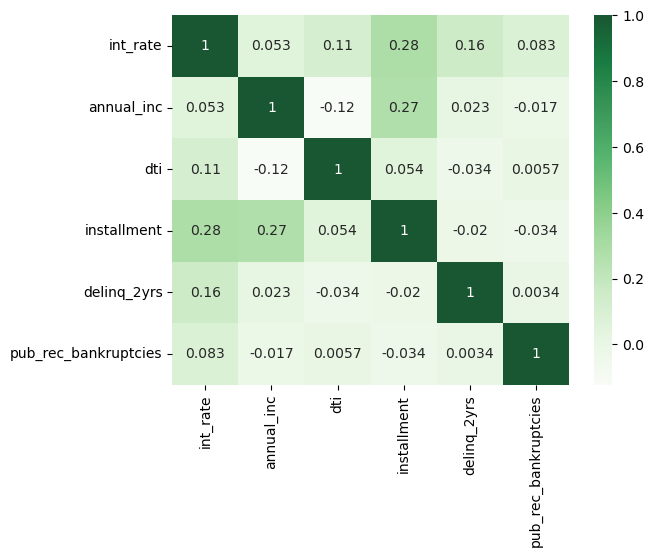

In [55]:
df_filtered= df[loan_status_continuous_col].corr()
sns.heatmap(df_filtered, cmap="Greens", annot=True, alpha=0.9)


## Compare loan_status with parameters like 
     * verification_Status
     * annual income
     * grade and subgrade
     * dti
     * delinq_2yrs
     * pub_rec_bankruptcies    

In [63]:
df_loan['delinq_2yrs'].isna().sum()

0

In [65]:
df_loan['verification_status'].value_counts()

verification_status
Verified        21292
Not Verified    16534
Name: count, dtype: int64

In [67]:
# Check if there is any relation with loan status and verification status

'''
df_temp = df_loan[['verification_status', 'loan_status']]
loan_status_veri = pd.pivot_table(data=df_temp, 
                                  index='verification_status', 
                                  columns='loan_status', 
                                  aggfunc='size', 
                                  fill_value=0)
loan_status_veri_perc = loan_status_veri[['Charged Off', 'Fully Paid']].apply(lambda x : x/x.sum(), axis=1)

loan_status_veri_perc.plot(kind = "bar", stacked=True, alpha=0.8)
plt.show()

'''

'\ndf_temp = df_loan[[\'verification_status\', \'loan_status\']]\nloan_status_veri = pd.pivot_table(data=df_temp, \n                                  index=\'verification_status\', \n                                  columns=\'loan_status\', \n                                  aggfunc=\'size\', \n                                  fill_value=0)\nloan_status_veri_perc = loan_status_veri[[\'Charged Off\', \'Fully Paid\']].apply(lambda x : x/x.sum(), axis=1)\n\nloan_status_veri_perc.plot(kind = "bar", stacked=True, alpha=0.8)\nplt.show()\n\n'

# Bivariate Analysis on UnOrdered Categorical
'verification_status', 'loan_status', 'home_ownership', 'purpose'

In [70]:
def count_plot_util(data, col, palette, percent, title, hue=None, y=None) :
    fig, ax = plt.subplots(figsize=(12,6), dpi=100)
    sns.countplot(data=data, x=col, palette=palette, order=df_loan[col].value_counts().index, hue=hue)
    # Calculate percentages and annotate on the bars
    total = len(data)
    for p in ax.patches:
        if percent :
            height = p.get_height()
            percentage = (height / total) * 100
            ax.annotate(f'{percentage:.1f}%', (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='center', fontsize=12, color='black', xytext=(0, 9),
                        textcoords='offset points')
        else: 
             count = p.get_height()  # Get the height of each bar (the count value)
             ax.annotate(f'{count}',  # Text to show on the bar
                (p.get_x() + p.get_width() / 2., p.get_height()),  # Positioning text in the center of the bar
                ha='center', va='center', fontsize=12, color='black',  # Alignment and style
                xytext=(0, 5),  # Offset text slightly above the bar
                textcoords='offset points')
    
    plt.legend()
    plt.xticks(rotation=90)
    plt.title(title)
    
    plt.show()

In [72]:
#Plot the percentage of defaulter against total values for the column
def bar_plot_defaulter_perc(data, col, title):
    purpose_default_loans = data[data['loan_status'] == 'Charged Off'][col].value_counts().reset_index()
    purpose_default_loans.columns = [col ,'count']
    
    purpose_total_loans = data[col].value_counts().reset_index()
    purpose_total_loans.columns = [col ,'total_count']
    
    result = pd.merge(purpose_default_loans, purpose_total_loans, on=col, how='inner')
    result['perc'] = result['count'] * 100/result['total_count']
    data = result[[col,'perc']]
    result_sorted = result.sort_values(by='perc', ascending=False)
    ax = sns.barplot(data=result_sorted, x=col, y='perc', palette="Set2", order=result_sorted[col])
    for p in ax.patches:
        # Get the height of each bar
        height = p.get_height()
        # Set the annotation on top of the bars
        ax.text(p.get_x() + p.get_width() / 2., height + 1, f'{height:.2f}%', 
                ha="center", va="bottom", fontsize=10, color='black', rotation=90)
    plt.xticks(rotation=90)
    plt.title(title)
    plt.show()

#### Loan Status Vs Verification status

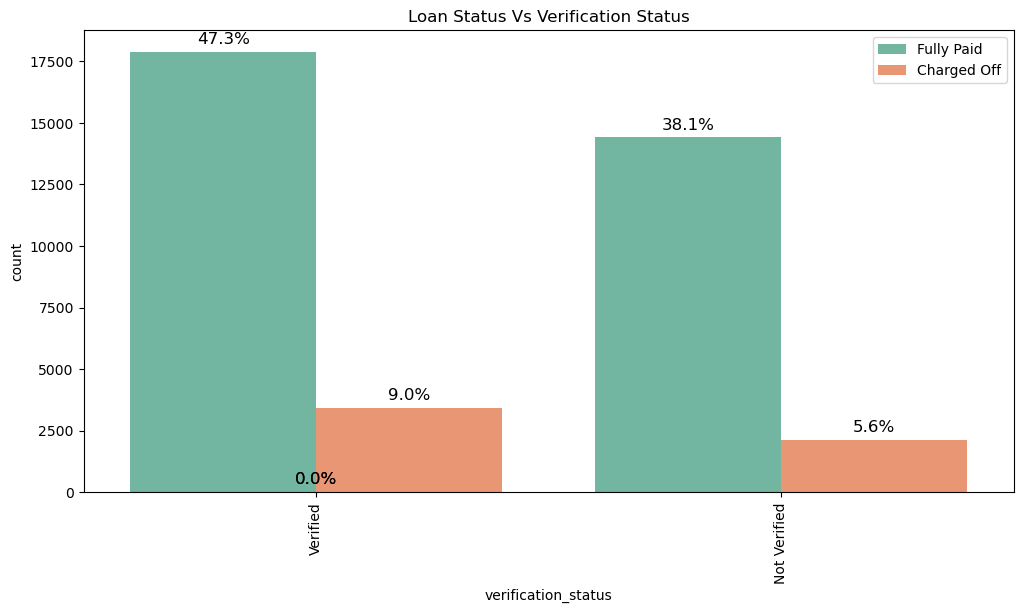

In [75]:
count_plot_util(df_loan, 'verification_status', "Set2", True, "Loan Status Vs Verification Status", 'loan_status')


**Insight -  Verified people are default loans more**

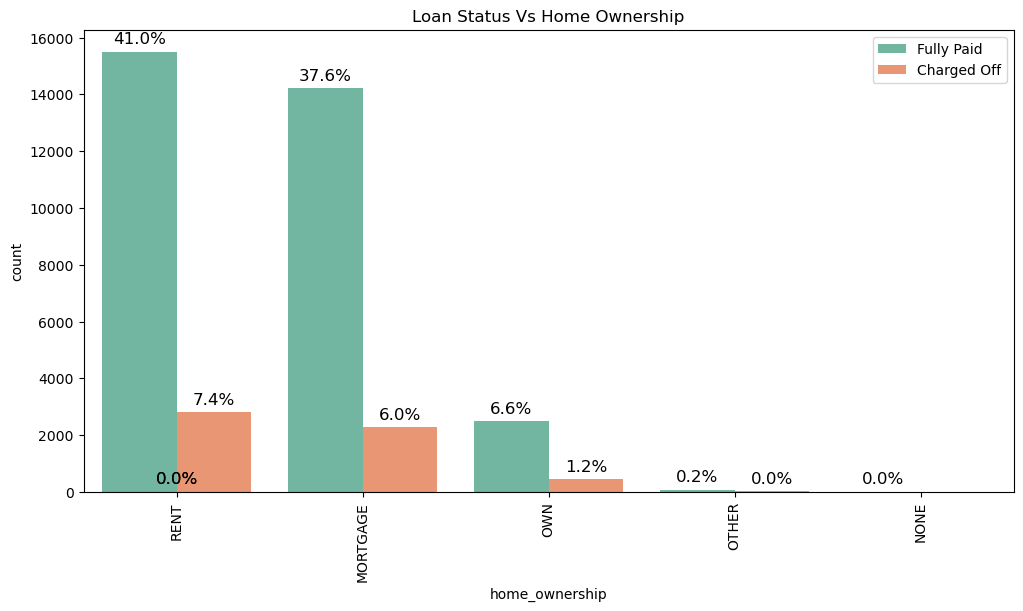

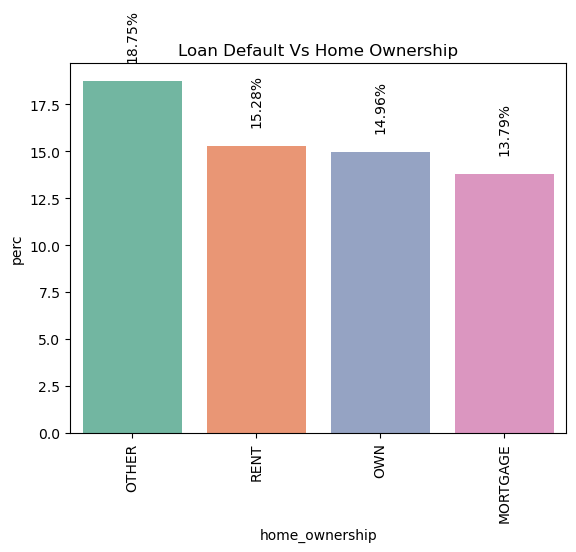

In [77]:
count_plot_util(df_loan, 'home_ownership', "Set2", True, "Loan Status Vs Home Ownership", 'loan_status')
bar_plot_defaulter_perc(df_loan, 'home_ownership', "Loan Default Vs Home Ownership")

**Insight - People with Other home ownership are more like to default**

### Loan Status Vs Purpose

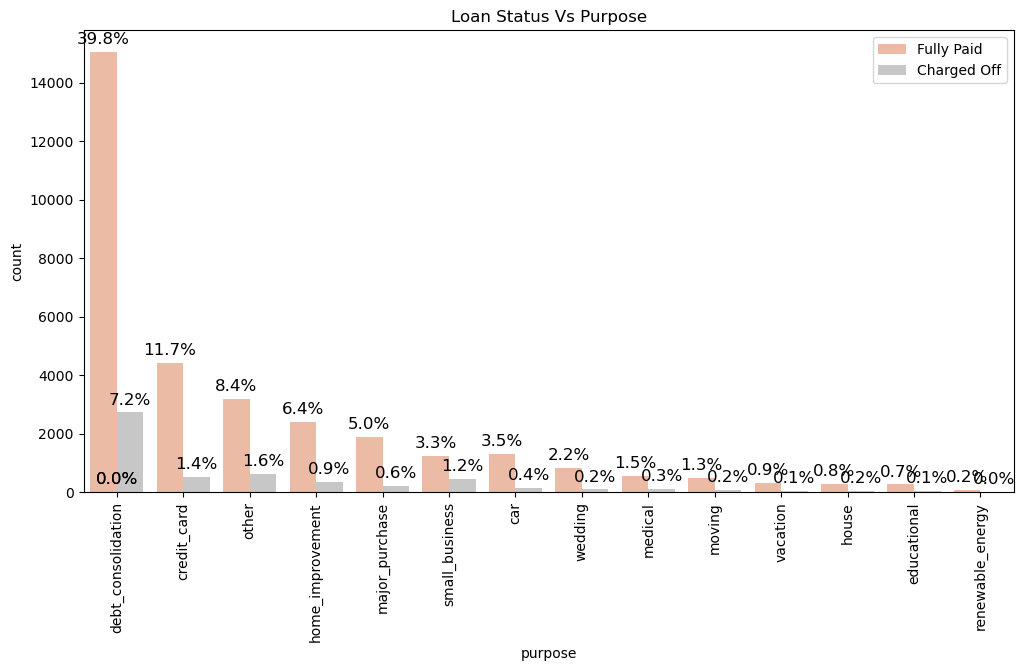

In [81]:
count_plot_util(df_loan, 'purpose', "RdGy", True, "Loan Status Vs Purpose", 'loan_status')

**Insight - Most loans are taken for debt_consolidation**

### Loan default by purpose

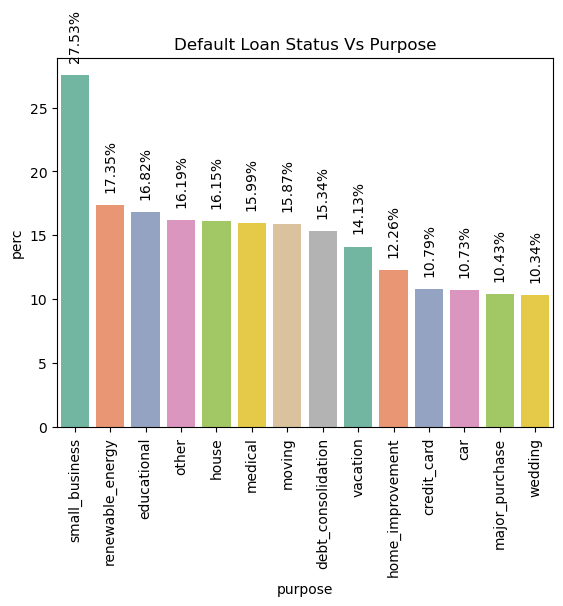

In [85]:
bar_plot_defaulter_perc(df_loan, 'purpose', "Default Loan Status Vs Purpose")

**Insight - small business default the most**

# Bivariate Analysis - Ordered Categorical 
'grade', 'sub_grade', 'term', 'emp_length'

#### Loan Status Vs Grade

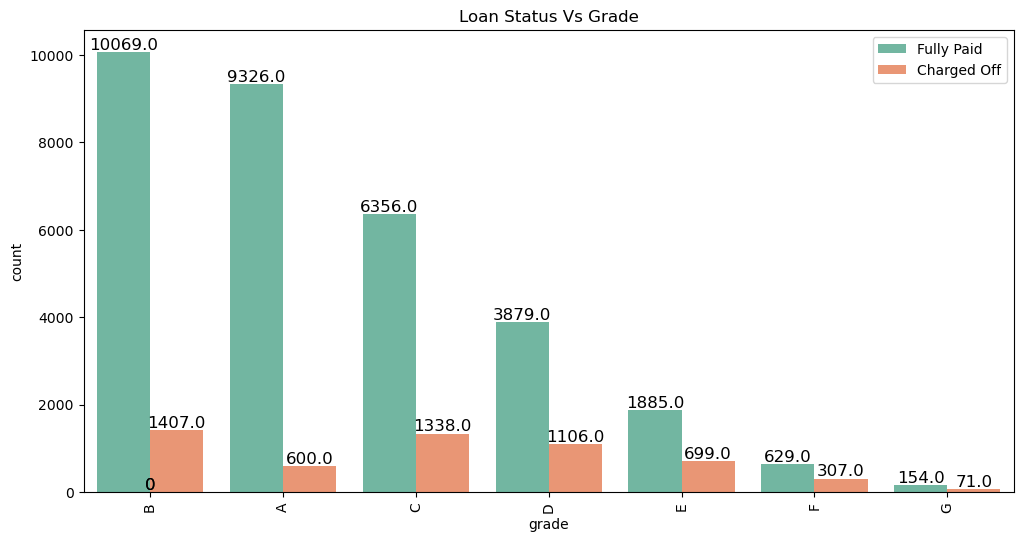

In [90]:
count_plot_util(df_loan, 'grade', "Set2", False, "Loan Status Vs Grade", 'loan_status')

**Insight - The loan with Grades B, C and D contribute to most number of "Charged Off" loans**

### Sub Grades Vs Loan Status

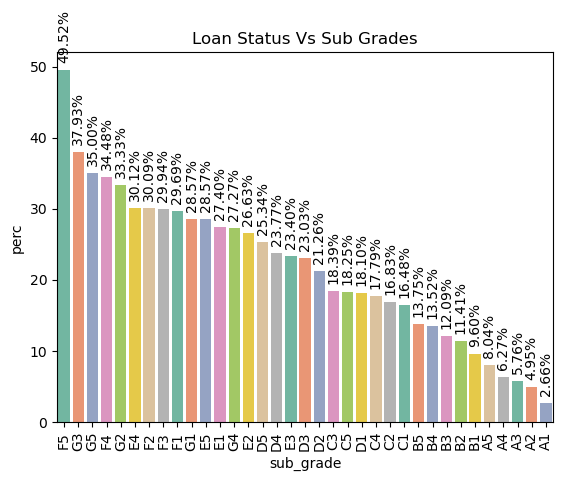

In [99]:
bar_plot_defaulter_perc(df_loan, 'sub_grade', "Loan Status Vs Sub Grades")

**Insight - F5 and G3 are the sub grades which are defaulted the most**

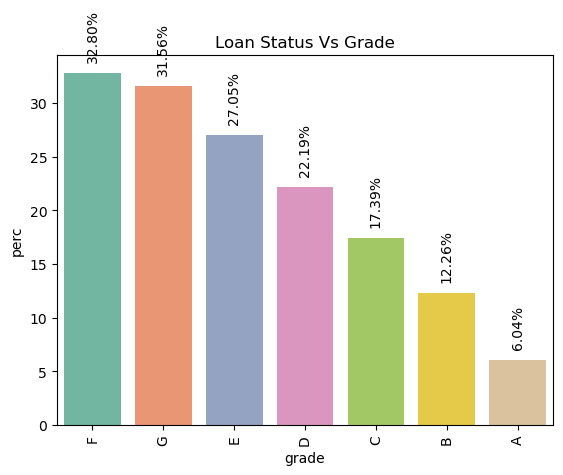

In [104]:
bar_plot_defaulter_perc(df_loan, 'grade', "Loan Status Vs Grade")

**Insight - The loan with Grades E, F, G are defaulted the most**

# Loan Status Vs Term

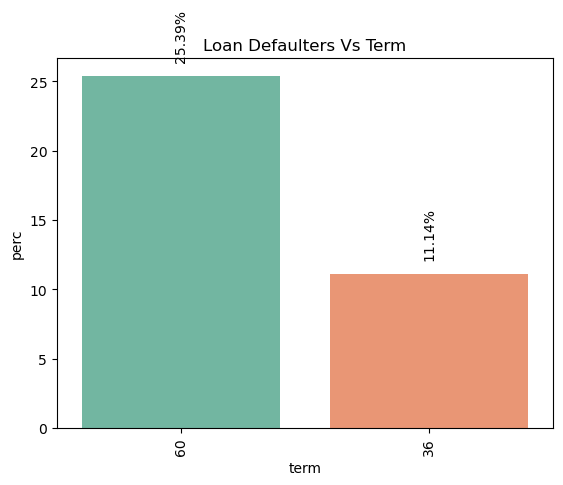

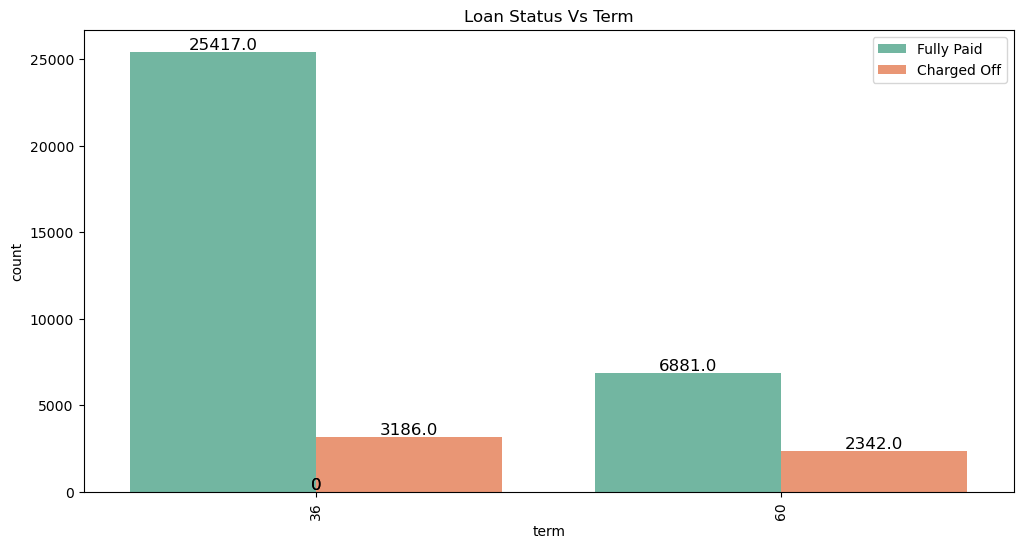

In [108]:
bar_plot_defaulter_perc(df_loan, 'term', "Loan Defaulters Vs Term")
count_plot_util(df_loan, 'term', "Set2", False, "Loan Status Vs Term", 'loan_status')

**Insight - 25% of loans with 60 months term get defaulted**

# Loan Status Vs Employee Length

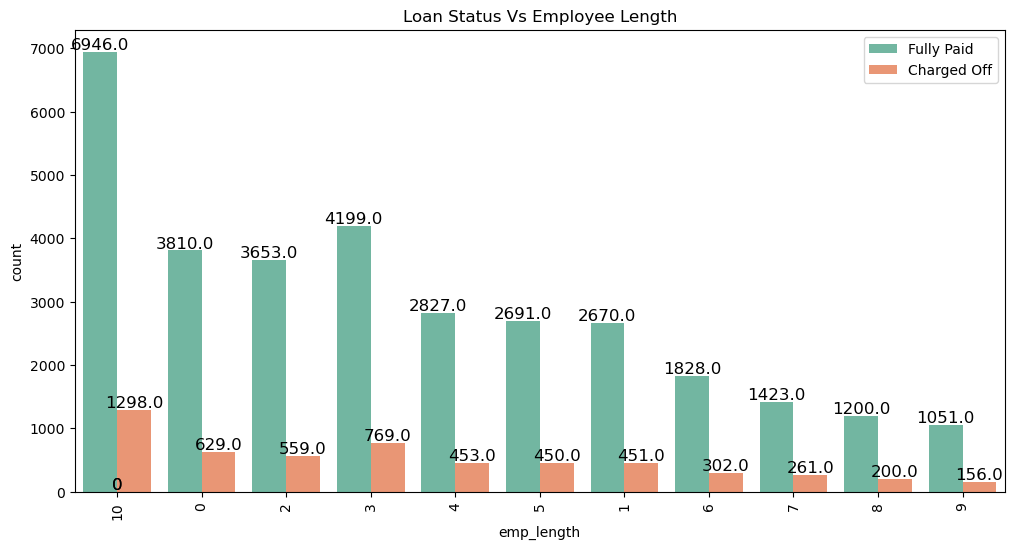

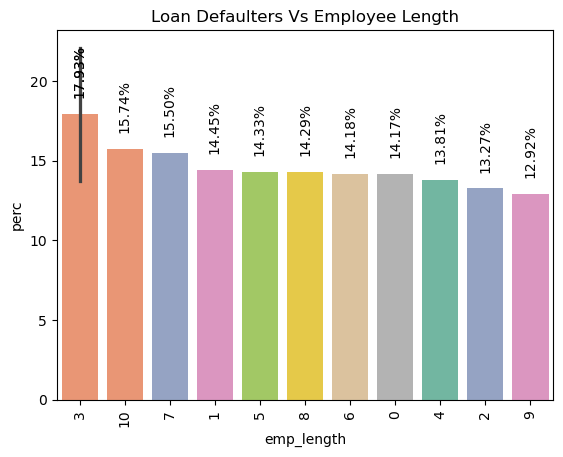

In [112]:
count_plot_util(df_loan, 'emp_length', "Set2", False, "Loan Status Vs Employee Length", 'loan_status')
bar_plot_defaulter_perc(df_loan, 'emp_length', "Loan Defaulters Vs Employee Length")


# Loan Status Vs Annual Income

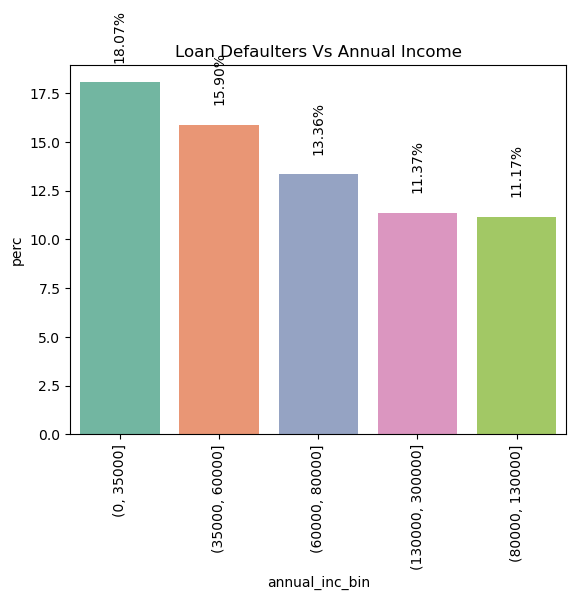

In [115]:
bar_plot_defaulter_perc(df_loan, 'annual_inc_bin', "Loan Defaulters Vs Annual Income")


**Insights - Most defaulters are with Annual income less than 35000**

# Loan Status Vs dti

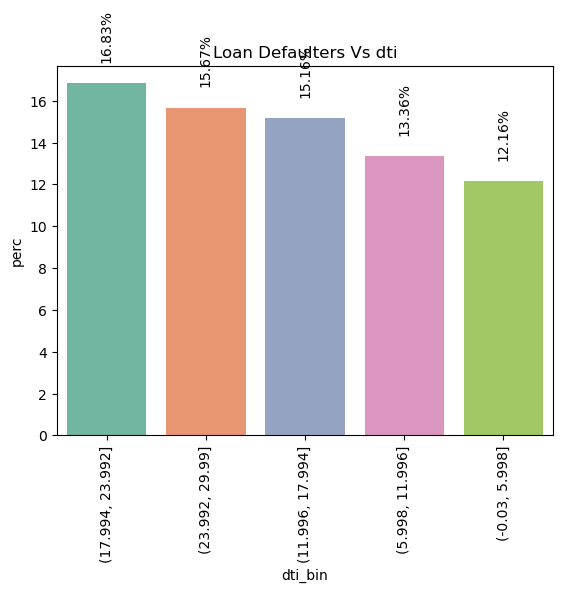

In [119]:
bar_plot_defaulter_perc(df_loan, 'dti_bin', "Loan Defaulters Vs dti")


**Insights - Higher dti leads to more defaulter**

# Loan Status Vs int rate

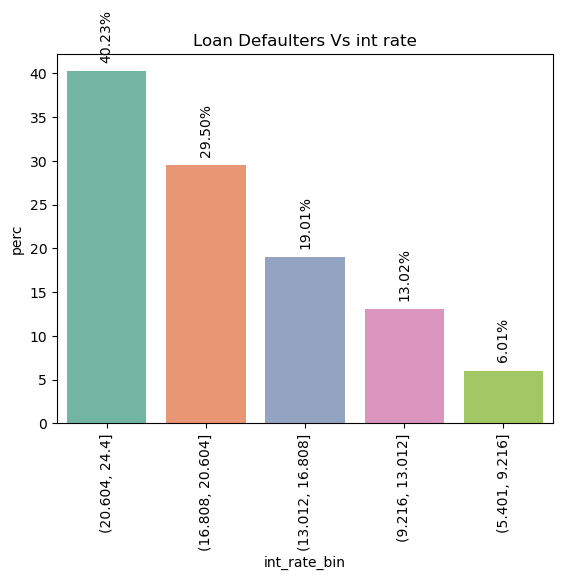

In [123]:
bar_plot_defaulter_perc(df_loan, 'int_rate_bin', "Loan Defaulters Vs int rate")


**Insights - 40.8% of loans get default with interest rate greater than 20%**

# Bivariate Analysis - Quantitative Analysis
'int_rate', 'annual_inc', 'dti', 'installment', 'delinq_2yrs', 'pub_rec_bankruptcies'


#### Loan Status Vs delinq_2yrs

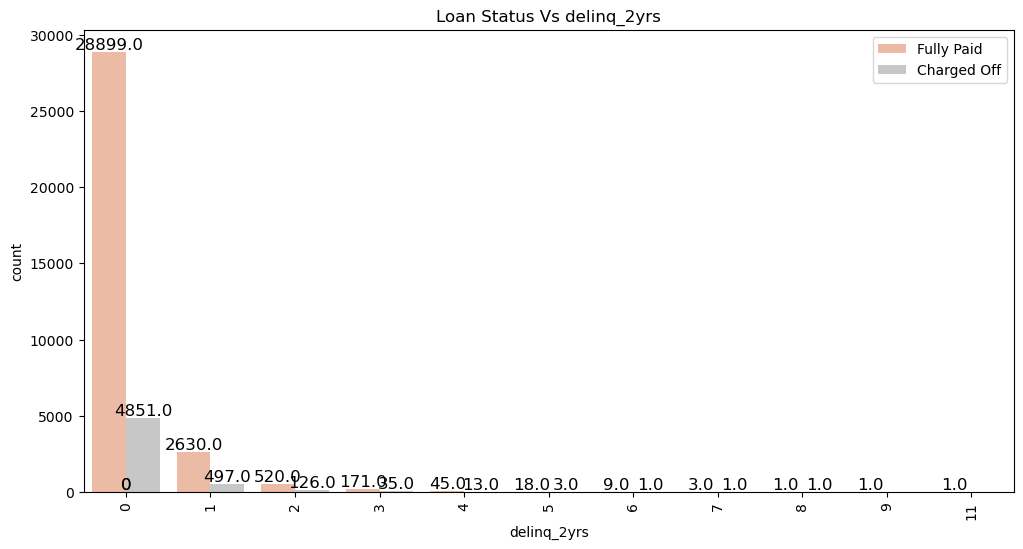

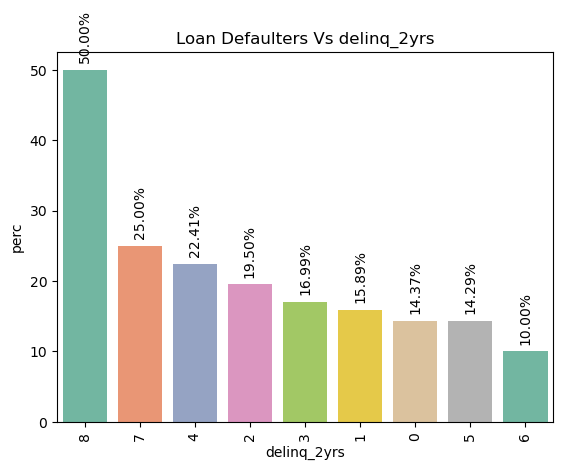

In [128]:
count_plot_util(df_loan, 'delinq_2yrs', "RdGy", False, "Loan Status Vs delinq_2yrs",'loan_status')
bar_plot_defaulter_perc(df_loan, 'delinq_2yrs', "Loan Defaulters Vs delinq_2yrs")

**Insight - Most loans are defaulted if there are 8 or more delinq in last 2 years**

## Loan Status Vs bankcrupties

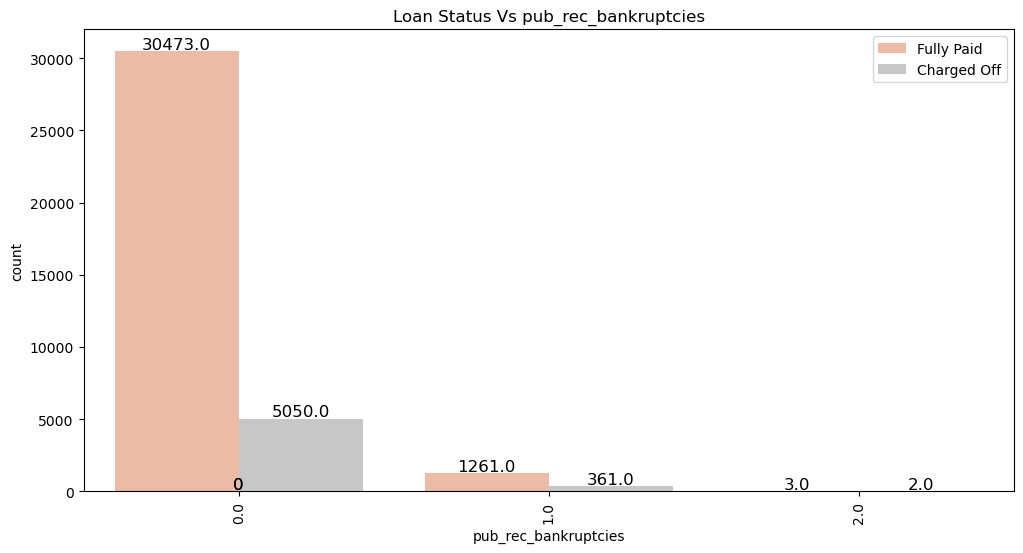

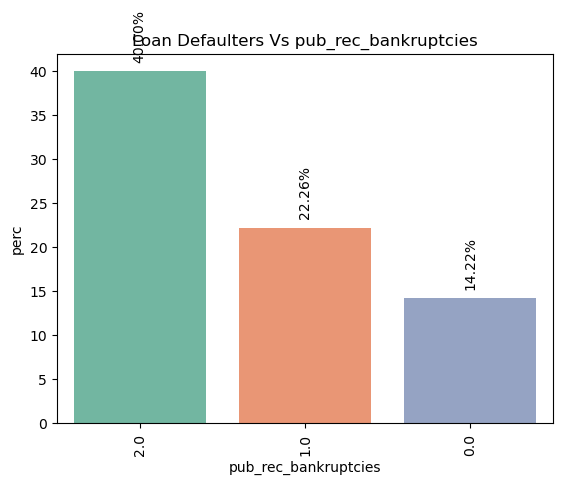

In [132]:
count_plot_util(df_loan, 'pub_rec_bankruptcies', "RdGy", False, "Loan Status Vs pub_rec_bankruptcies",'loan_status')
bar_plot_defaulter_perc(df_loan, 'pub_rec_bankruptcies', "Loan Defaulters Vs pub_rec_bankruptcies")

**Insight - 62.36% loans are defaulted if there public record bankrupties**